## Regression Plot
### seaborn.regplot¶
seaborn.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
Plot data and a linear regression model fit.

There are a number of mutually exclusive options for estimating the regression model. See the tutorial for more information.

Parameters
x, y: string, series, or vector array
Input variables. If strings, these should correspond with column names in data. When pandas objects are used, axes will be labeled with the series name.

dataDataFrame
Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

x_estimatorcallable that maps vector -> scalar, optional
Apply this function to each unique value of x and plot the resulting estimate. This is useful when x is a discrete variable. If x_ci is given, this estimate will be bootstrapped and a confidence interval will be drawn.

x_binsint or vector, optional
Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.

x_ci“ci”, “sd”, int in [0, 100] or None, optional
Size of the confidence interval used when plotting a central tendency for discrete values of x. If "ci", defer to the value of the ci parameter. If "sd", skip bootstrapping and show the standard deviation of the observations in each bin.

scatterbool, optional
If True, draw a scatterplot with the underlying observations (or the x_estimator values).

fit_regbool, optional
If True, estimate and plot a regression model relating the x and y variables.

ciint in [0, 100] or None, optional
Size of the confidence interval for the regression estimate. This will be drawn using translucent bands around the regression line. The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None.

n_bootint, optional
Number of bootstrap resamples used to estimate the ci. The default value attempts to balance time and stability; you may want to increase this value for “final” versions of plots.

unitsvariable name in data, optional
If the x and y observations are nested within sampling units, those can be specified here. This will be taken into account when computing the confidence intervals by performing a multilevel bootstrap that resamples both units and observations (within unit). This does not otherwise influence how the regression is estimated or drawn.

seedint, numpy.random.Generator, or numpy.random.RandomState, optional
Seed or random number generator for reproducible bootstrapping.

orderint, optional
If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

logisticbool, optional
If True, assume that y is a binary variable and use statsmodels to estimate a logistic regression model. Note that this is substantially more computationally intensive than linear regression, so you may wish to decrease the number of bootstrap resamples (n_boot) or set ci to None.

lowessbool, optional
If True, use statsmodels to estimate a nonparametric lowess model (locally weighted linear regression). Note that confidence intervals cannot currently be drawn for this kind of model.

robustbool, optional
If True, use statsmodels to estimate a robust regression. This will de-weight outliers. Note that this is substantially more computationally intensive than standard linear regression, so you may wish to decrease the number of bootstrap resamples (n_boot) or set ci to None.

logxbool, optional
If True, estimate a linear regression of the form y ~ log(x), but plot the scatterplot and regression model in the input space. Note that x must be positive for this to work.

{x,y}_partialstrings in data or matrices
Confounding variables to regress out of the x or y variables before plotting.

truncatebool, optional
If True, the regression line is bounded by the data limits. If False, it extends to the x axis limits.

{x,y}_jitterfloats, optional
Add uniform random noise of this size to either the x or y variables. The noise is added to a copy of the data after fitting the regression, and only influences the look of the scatterplot. This can be helpful when plotting variables that take discrete values.

labelstring
Label to apply to either the scatterplot or regression line (if scatter is False) for use in a legend.

colormatplotlib color
Color to apply to all plot elements; will be superseded by colors passed in scatter_kws or line_kws.

markermatplotlib marker code
Marker to use for the scatterplot glyphs.

{scatter,line}_kwsdictionaries
Additional keyword arguments to pass to plt.scatter and plt.plot.

axmatplotlib Axes, optional
Axes object to draw the plot onto, otherwise uses the current Axes.

Returns
axmatplotlib Axes
The Axes object containing the plot.

Examples

Plot the relationship between two variables in a DataFrame:

In [8]:
import seaborn as sns
sns.set(color_codes=True)
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


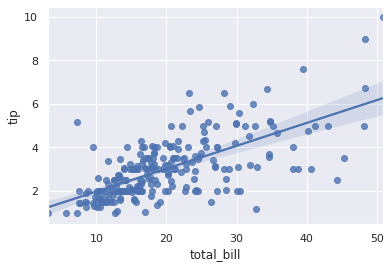

In [9]:
ax = sns.regplot(x='total_bill', y='tip', data=tips)

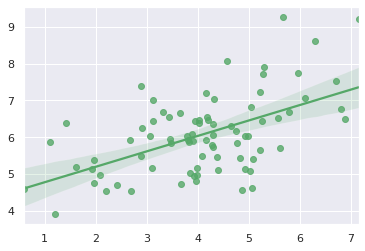

In [10]:
# Plot with two variables defined as numpy arrays; use a different color:

import numpy as np; np.random.seed(8)
mean, cov = [4, 6], [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, cov, 80).T
sns.regplot(x, y, color='g')

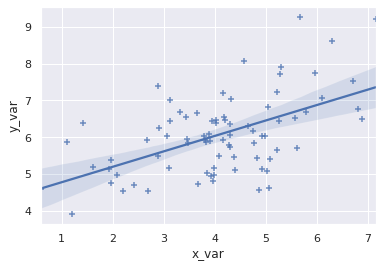

In [11]:
# Plot with two variables defined as pandas Series; use a different marker:

import pandas as pd
x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")
sns.regplot(x, y, marker='+')

Use a 68% confidence interval, which corresponds with the standard error of the estimate, and extend the regression line to the axis limits:

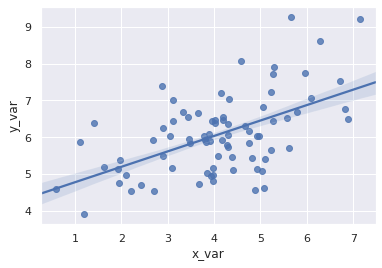

In [12]:
sns.regplot(x, y, ci=68, truncate=False)

Plot with a discrete x variable and add some jitter:

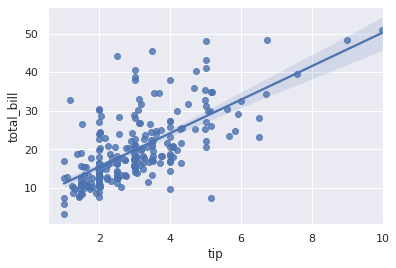

In [16]:
sns.regplot(x='tip', y='total_bill', data=tips, x_jitter=0.01)
#sns.regplot(x='tip', y='total_bill', data=tips, x_jitter=1)

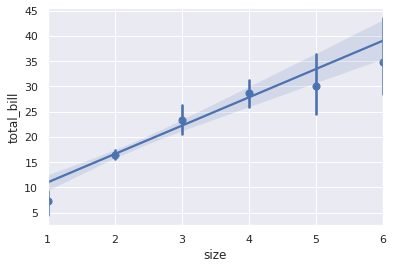

In [18]:
#Plot with a discrete x variable showing means and confidence intervals for unique values:

ax = sns.regplot(x="size", y="total_bill", data=tips,
                 x_estimator=np.mean)